## 빅데이터 실습

### COVID19, 코로나 바이러스의 영향으로 중국인 관광객수 감소 분석



In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
from matplotlib import rcParams, font_manager, rc

font_path = 'C:/Windows/Fonts/malgun.ttf'
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font)
rcParams['axes.unicode_minus'] = False

In [3]:
df_total = pd.read_excel('../day03/data/kto_total.xlsx')


In [4]:
condition = df_total['국적'] == '중국'

In [5]:
df_china = df_total[condition]
df_china.reset_index(inplace=True)
df_china

,index,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,17,중국,40425,11930,55,2751,36091,91252,2010-01,아시아,44.3,10.1
1,77,중국,60590,7907,68,29546,42460,140571,2010-02,아시아,43.1,13.6
2,137,중국,50330,13549,174,14924,62480,141457,2010-03,아시아,35.6,9.2
3,197,중국,84252,13306,212,2199,47711,147680,2010-04,아시아,57.1,15.5
4,257,중국,89056,12325,360,2931,49394,154066,2010-05,아시아,57.8,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...
120,7217,중국,393336,2813,99,10433,75000,481681,2020-01,아시아,81.7,38.2
121,7277,중국,49520,715,11,20753,33087,104086,2020-02,아시아,47.6,9.8
122,7337,중국,5040,115,2,7388,4050,16595,2020-03,아시아,30.4,16.0
123,7397,중국,522,71,0,1112,2230,3935,2020-04,아시아,13.3,10.2


In [6]:
day1 = [f'{i}-01' for i in range(2010,2021)]

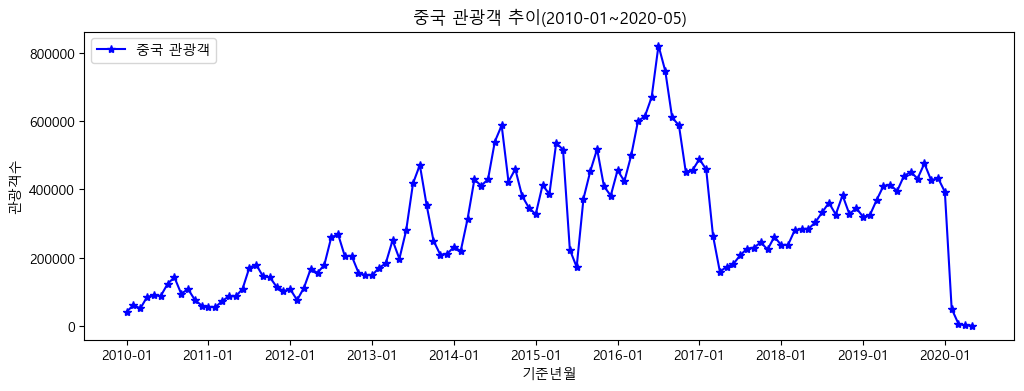

In [7]:
plt.figure(figsize=(12,4))
plt.plot(df_china['기준년월'],df_china['관광'],label = '중국 관광객', color ='b', marker='*')
plt.title('중국 관광객 추이(2010-01~2020-05)')
plt.xlabel('기준년월')
plt.ylabel('관광객수')
plt.legend(loc='upper left')
plt.xticks(day1)
plt.show()


### 관광객수 top5 나라 시각화

In [8]:
con = ['중국','일본','대만','미국','홍콩']

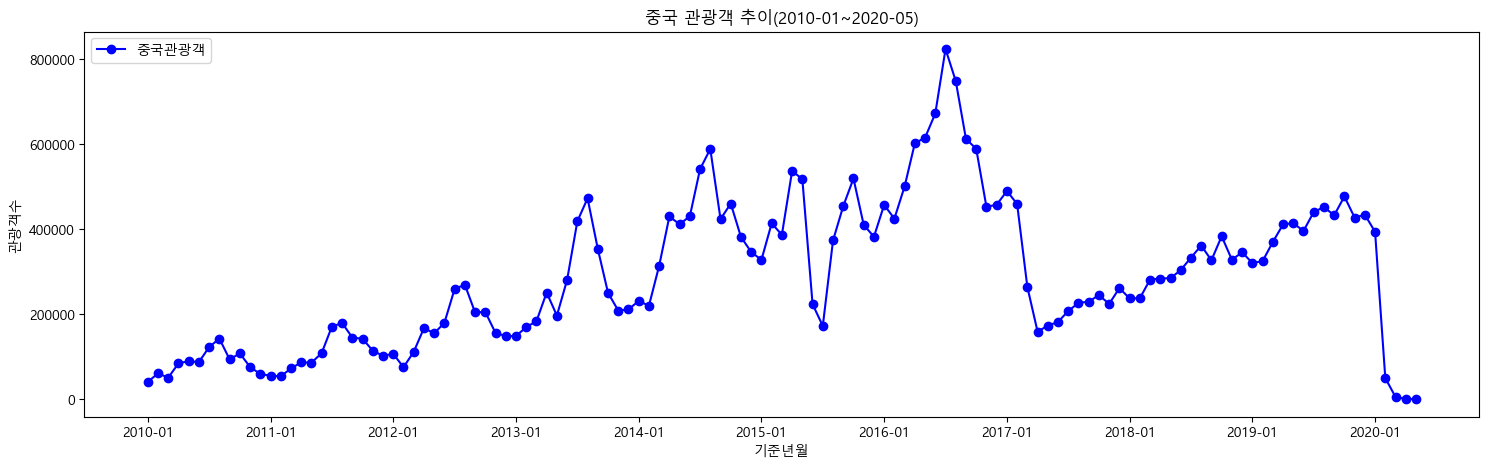

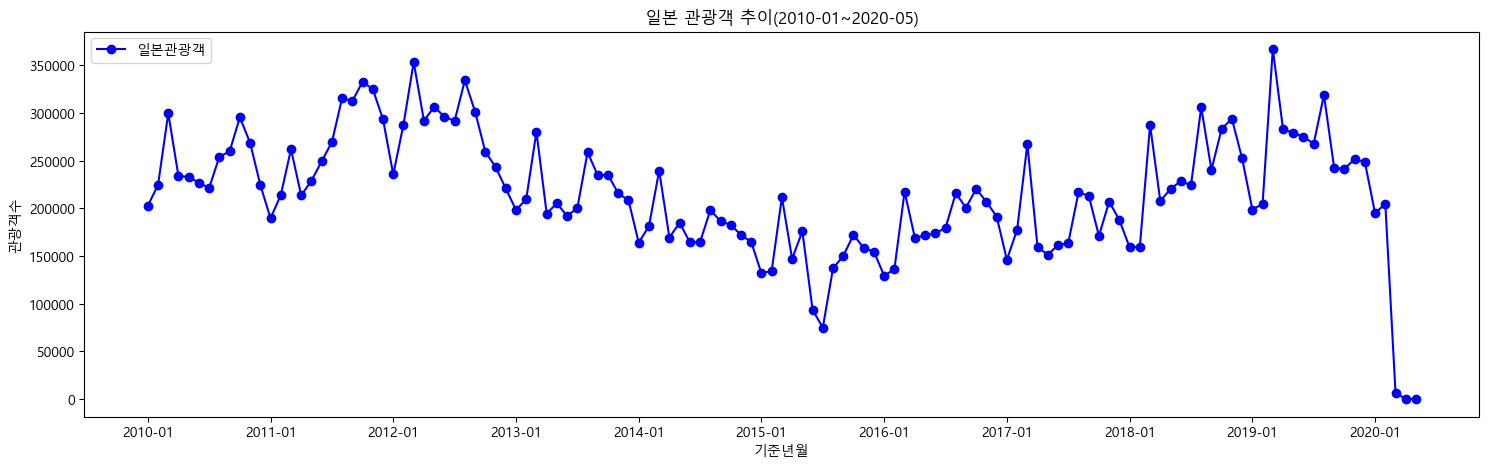

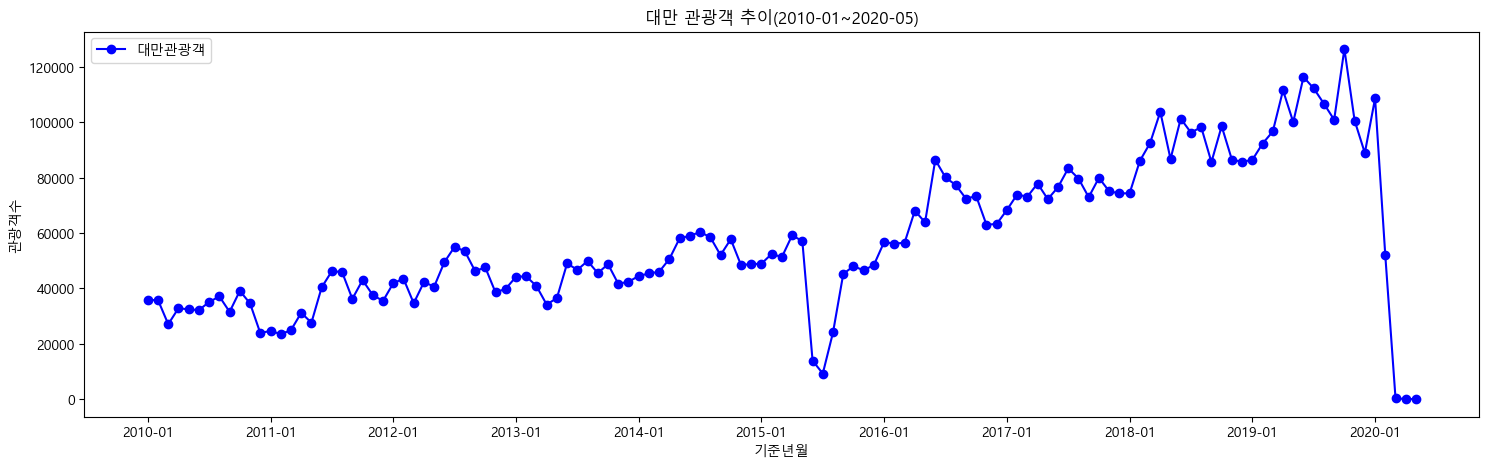

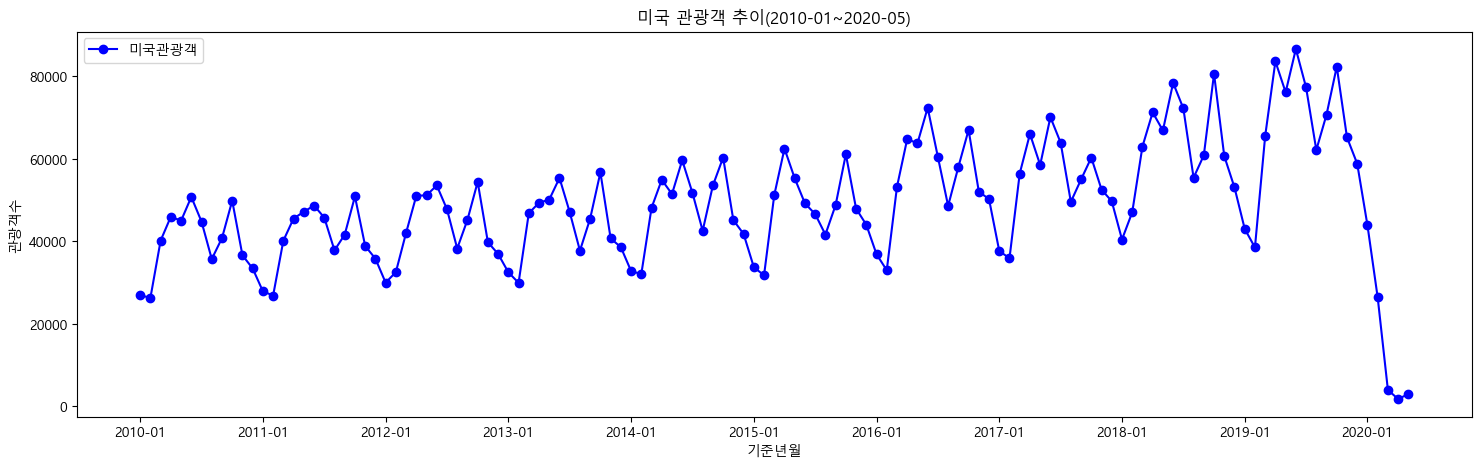

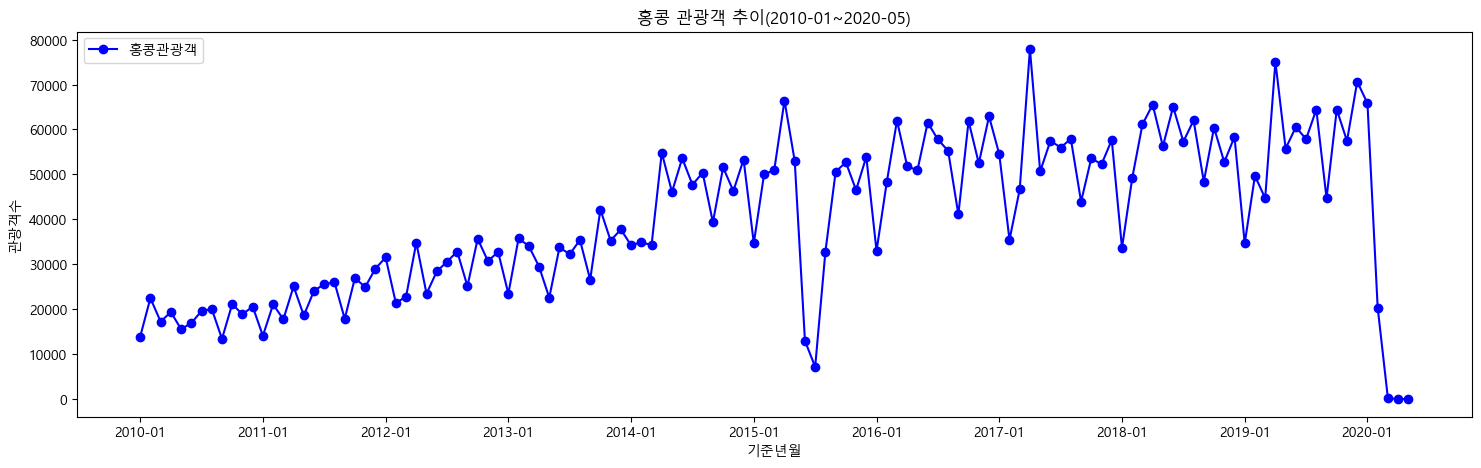

In [9]:
for con in ['중국','일본','대만','미국','홍콩']:
    condition = df_total['국적'] == con
    df_filter = df_total[condition]

    plt.figure(figsize=(18,5))
    plt.plot(df_filter['기준년월'],df_filter['관광'],label = f'{con}관광객', color ='b', marker='o')
    plt.title(f'{con} 관광객 추이(2010-01~2020-05)')
    plt.xlabel('기준년월')
    plt.ylabel('관광객수')
    plt.legend(loc='upper left')
    plt.xticks(day1)
    plt.show()

In [10]:
import warnings
warnings.filterwarnings("ignore")

In [11]:
# 관광객수 TOP 5
var2 = df_total.sort_values(by='관광', ascending= False)
var2.drop_duplicates(['국적']).head(5)
# .drop_duplicates(['']) 인덱스 중복 제외

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
4697,중국,823016,4103,354,7122,82924,917519,2016-07,아시아,89.7,58.6
6600,일본,367157,2108,126,1231,4497,375119,2019-03,아시아,97.9,29.3
7021,대만,126421,81,10,135,1297,127944,2019-10,아시아,98.8,9.0
6805,미국,86508,367,3470,350,14703,105398,2019-06,아메리카,82.1,7.0
5222,홍콩,77904,34,2,53,1074,79067,2017-04,아시아,98.5,9.1


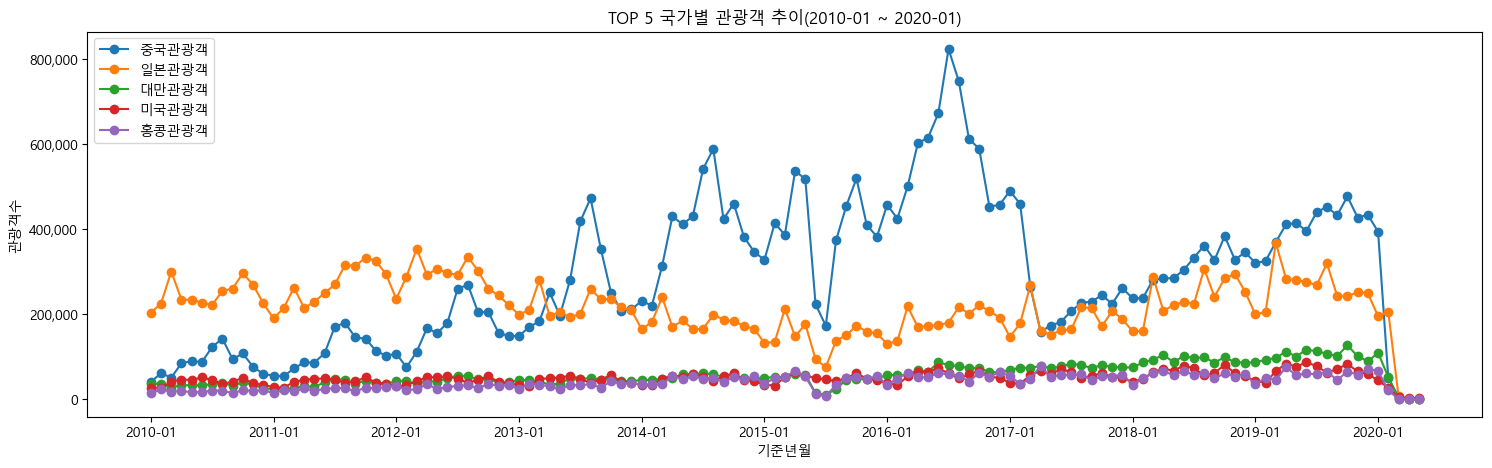

In [12]:
plt.figure(figsize=(18,5))
for con in ['중국','일본','대만','미국','홍콩']:
    condition = df_total['국적'] == con
    df_filter = df_total[condition]

    
    plt.plot(df_filter['기준년월'],df_filter['관광'],label = f'{con}관광객', marker='o')
    plt.xlabel('기준년월')
    plt.ylabel('관광객수')
    plt.legend(loc='upper left')
    plt.xticks(day1)
    
plt.gca().set_yticklabels([f'{x:,.0f}'for x in plt.gca().get_yticks()])
plt.title(f'TOP 5 국가별 관광객 추이(2010-01 ~ 2020-01)')
plt.show()

### 히트맵

년도와 월을 하나의 컬럼에서 분리

In [13]:
## 년도, 월 분리
df_total['년도'] = df_total['기준년월'].str.slice(0,4)
df_total['월'] = df_total['기준년월'].str.slice(5,7)
df_total.drop(labels='기준년월',axis=1)

,국적,관광,상용,공용,유학/연수,기타,계,대륙,관광객비율(%),전체비율(%),년도,월
0,일본,202825,1750,89,549,3971,209184,아시아,97.0,50.6,2010,01
1,대만,35788,41,17,37,516,36399,아시아,98.3,8.9,2010,01
2,홍콩,13874,55,0,21,595,14545,아시아,95.4,3.5,2010,01
3,마카오,554,0,0,0,0,554,아시아,100.0,0.1,2010,01
4,태국,13374,39,13,53,4335,17814,아시아,75.1,3.3,2010,01
...,...,...,...,...,...,...,...,...,...,...,...,...
7495,대양주 기타,1,0,1,0,3,5,오세아니아,20.0,0.0,2020,05
7496,남아프리카공화국,1,0,3,0,25,29,아프리카,3.4,0.0,2020,05
7497,아프리카 기타,3,1,3,6,118,131,아프리카,2.3,0.0,2020,05
7498,국적미상,1,0,0,0,3,4,기타대륙,25.0,0.0,2020,05


In [14]:
condition = df_total['국적'] == '중국'
df_china = df_total[condition]

In [15]:
# 피벗테이블로 구성
df_chinaPivot = df_china.pivot_table(values=['관광'],index=['년도'], columns=['월'], aggfunc='sum')

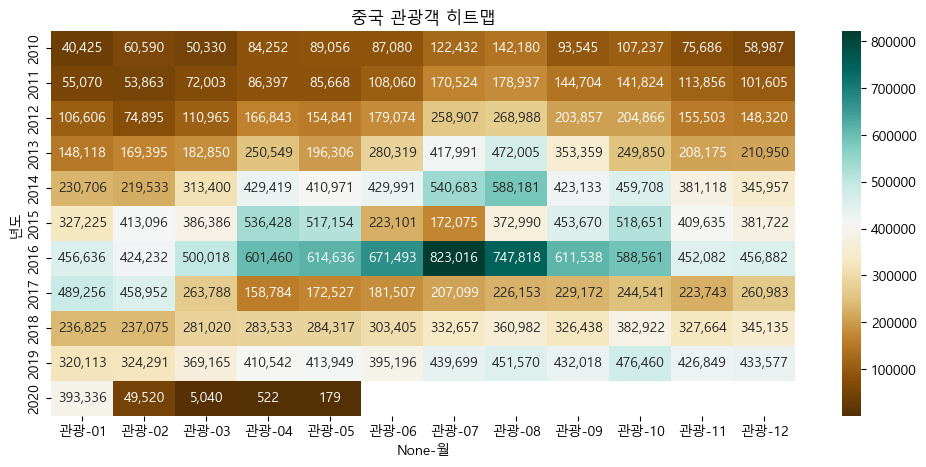

In [16]:
# 히트맵
plt.figure(figsize=(12,5))
ax = sns.heatmap(df_chinaPivot, annot=True, fmt='.0f',cmap='BrBG')
plt.title('중국 관광객 히트맵')

for t in ax.texts:  # 1000 단위마다 쉼표
    t.set_text(f'{int(t.get_text()):,d}')   
plt.show()

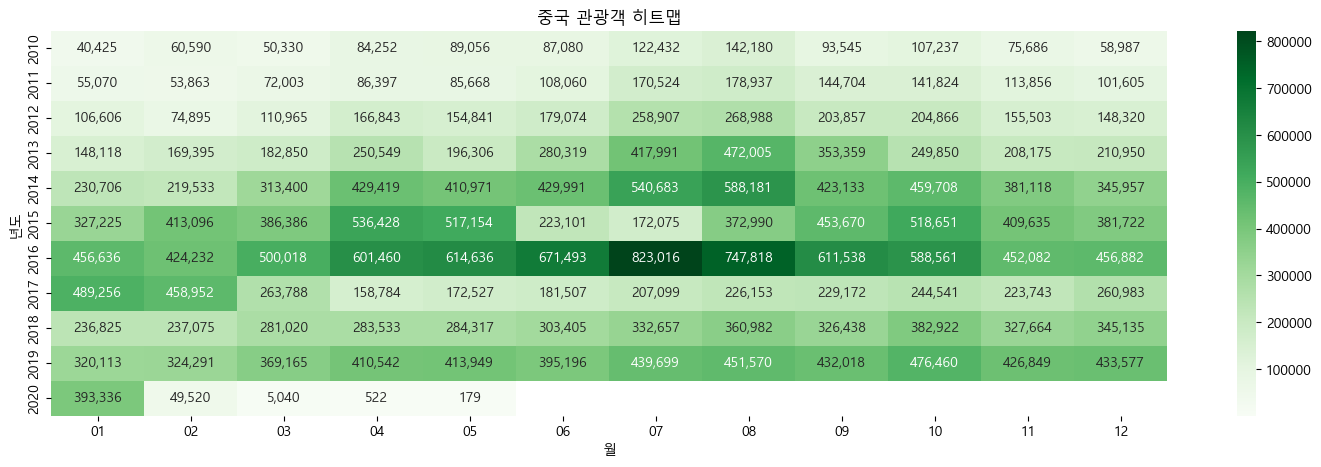

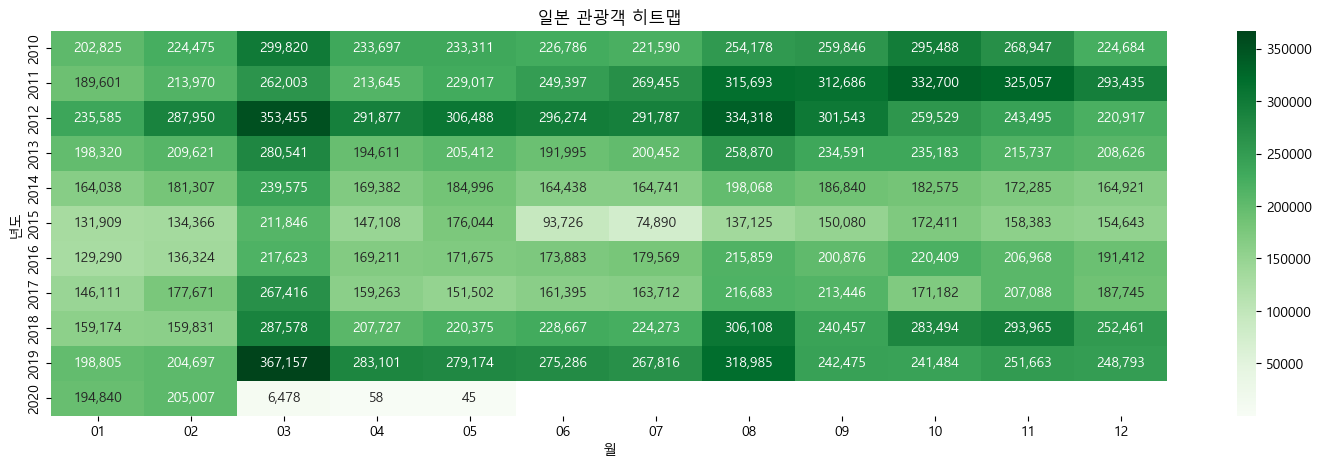

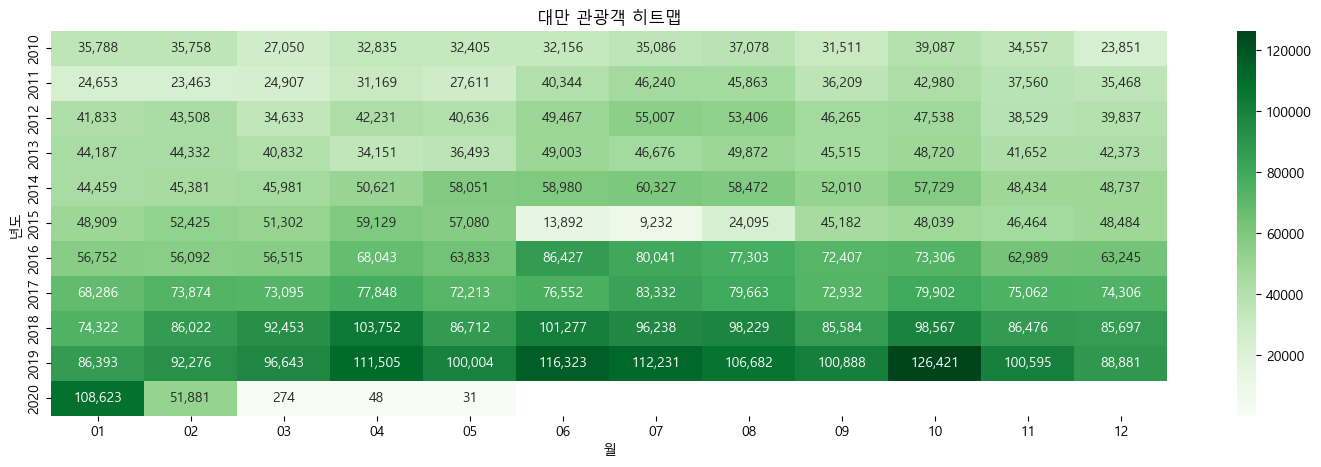

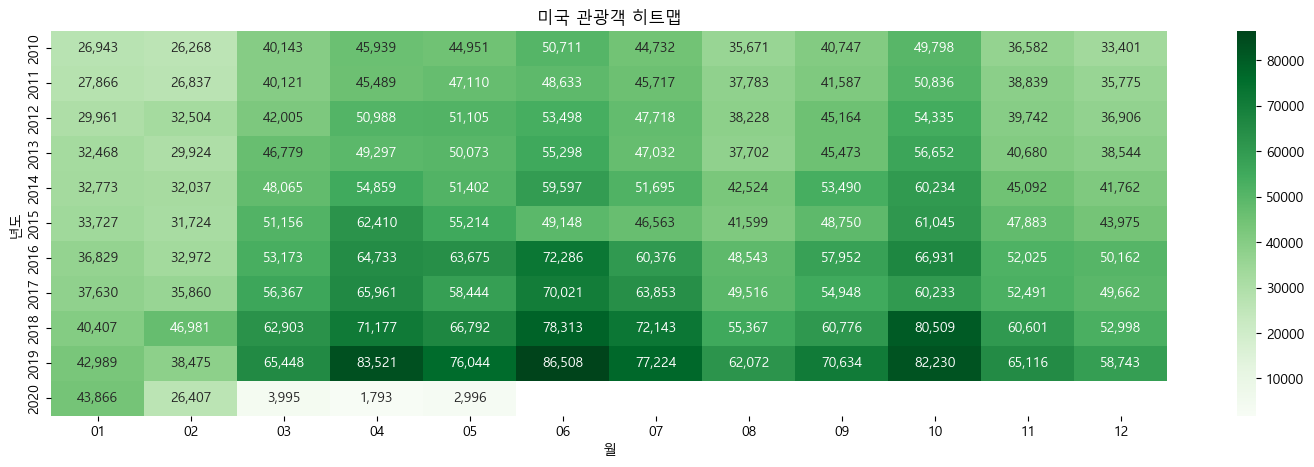

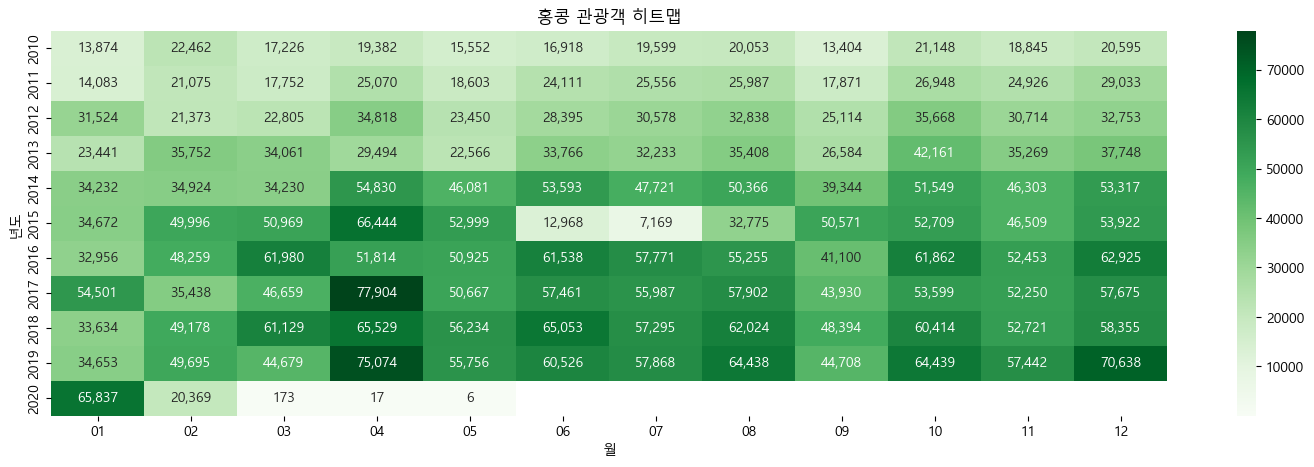

In [17]:
for con in ['중국','일본','대만','미국','홍콩']:
    condition = df_total['국적'] == con
    df_filter = df_total[condition]

    plt.figure(figsize=(18,5))
    df_pivoit = df_filter.pivot_table(values='관광', index='년도', columns='월',aggfunc='sum')

    ax=sns.heatmap(df_pivoit, annot=True, fmt='.0f', cmap='Greens')
    plt.title(f'{con} 관광객 히트맵')

    for t in ax.texts:
        t.set_text(f'{int(t.get_text()):,d}')

plt.show()

##### 시각화 차트, 히트맵으로 분석

- 2010년 이후로 꾸준히 증가
- 2017년 초 큰폭으로 감소
- 여름에 관광객이 몰림, 하지만 2015년 관광객 크게 감소
- 2020년 초 관광객 0에 가깝게 떨어짐

##### 이벤트 발생이유 검색
- 2015년 메르스 관광객 감소
- 2016년 중국인방문의해 크게 증가
- 2017년 사드보복 중국인 관광객 크게 감소
- 2020년 코로나 창궐 > 모든나라 동일 관광객 감소